## 1. Import Data and Libraries

In [56]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

import warnings
warnings.simplefilter(action='ignore')

In [2]:
df_covid = pd.read_csv("World_Covid19_cases.csv")
df_covid = df_covid.drop("Number", axis = 1)

In [3]:
df_covid

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Critical Cases,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,USA,"3,893,949","60,678","143,263",386.0,"1,802,110","1,948,576","16,616","11,761",433,"48,324,182","145,951","331,097,557"
1,Brazil,"2,098,389","23,143","79,488",671.0,"1,371,229","647,672","8,318","9,869",374,"4,911,063","23,096","212,632,374"
2,India,"1,118,107","40,243","27,503",675.0,"700,399","390,205","8,944",810,20,"13,791,869","9,989","1,380,641,231"
3,Russia,"771,546","6,109","12,342",95.0,"550,344","208,860","2,300","5,287",85,"24,991,740","171,249","145,937,686"
4,South Africa,"364,328","13,449","5,033",85.0,"191,059","168,236",539,"6,139",85,"2,471,747","41,652","59,342,751"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,Caribbean Netherlands,10,NaN,NaN,NaN,7,3,NaN,381,NaN,424,"16,162","26,235"
210,British Virgin Islands,8,NaN,1,NaN,7,0,NaN,265,33,439,"14,517","30,241"
211,St. Barth,6,NaN,NaN,NaN,6,0,NaN,607,NaN,897,"90,799","9,879"
212,Saint Pierre Miquelon,4,NaN,NaN,NaN,1,3,NaN,691,NaN,NaN,NaN,"5,792"


## 2. Perform the necessary preprocessing

In [4]:
columns =["Country", "Total Cases","Total Deaths", "Total Recovered", "Active Cases", "Critical Cases", "Total Tests", "Population"]

df_covid_ = df_covid[columns]


In [5]:
df_covid_["Total Cases"] = df_covid_["Total Cases"].str.replace(",","")
df_covid_["Total Deaths"] = df_covid_["Total Deaths"].str.replace(",","")
df_covid_["Total Recovered"] = df_covid_["Total Recovered"].str.replace(",","")
df_covid_["Active Cases"] = df_covid_["Active Cases"].str.replace(",","")
df_covid_["Critical Cases"] = df_covid_["Critical Cases"].str.replace(",","")
df_covid_["Total Tests"] = df_covid_["Total Tests"].str.replace(",","")
df_covid_["Population"] = df_covid_["Population"].str.replace(",","")

In [6]:
df_c = pd.DataFrame()
df_c["Country"] = df_covid_["Country"]

In [7]:
df_covid_ = df_covid_.drop("Country", axis=1)

In [8]:
df_covid_ = df_covid_.apply(pd.to_numeric,errors='coerce')

In [9]:
df_covid_.insert(loc=0,column= "Country", value=df_c)

In [10]:
df_covid_["Total Deaths"].fillna(0, inplace = True) 
df_covid_["Critical Cases"].fillna(0, inplace = True) 

In [11]:
df_covid_

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Critical Cases,Total Tests,Population
0,USA,3893949.0,143263.0,1802110.0,1948576.0,16616.0,48324182.0,3.310976e+08
1,Brazil,2098389.0,79488.0,1371229.0,647672.0,8318.0,4911063.0,2.126324e+08
2,India,1118107.0,27503.0,700399.0,390205.0,8944.0,13791869.0,1.380641e+09
3,Russia,771546.0,12342.0,550344.0,208860.0,2300.0,24991740.0,1.459377e+08
4,South Africa,364328.0,5033.0,191059.0,168236.0,539.0,2471747.0,5.934275e+07
...,...,...,...,...,...,...,...,...
209,Caribbean Netherlands,10.0,0.0,7.0,3.0,0.0,424.0,2.623500e+04
210,British Virgin Islands,8.0,1.0,7.0,0.0,0.0,439.0,3.024100e+04
211,St. Barth,6.0,0.0,6.0,0.0,0.0,897.0,9.879000e+03
212,Saint Pierre Miquelon,4.0,0.0,1.0,3.0,0.0,NaN,5.792000e+03


In [12]:
df_covid_ = df_covid_.dropna()

In [13]:
df_covid_.isnull().sum()

Country            0
Total Cases        0
Total Deaths       0
Total Recovered    0
Active Cases       0
Critical Cases     0
Total Tests        0
Population         0
dtype: int64

In [14]:
df_covid_.shape

(194, 8)

In [15]:
df_covid_.dtypes

Country             object
Total Cases        float64
Total Deaths       float64
Total Recovered    float64
Active Cases       float64
Critical Cases     float64
Total Tests        float64
Population         float64
dtype: object

In [16]:
df_covid_["Pop_ML"] = df_covid_["Population"]/1000000

df_covid_["Mortality_rate"] = df_covid_["Total Deaths"]/df_covid_["Total Cases"]
df_covid_["Cases_per_ML"] = df_covid_["Total Cases"]/df_covid_["Pop_ML"]
df_covid_["Deaths_per_ML"] = df_covid_["Total Deaths"]/df_covid_["Pop_ML"]
df_covid_["Recovered_per_ML"] = df_covid_["Total Recovered"]/df_covid_["Pop_ML"]
df_covid_["Active_per_ML"] = df_covid_["Active Cases"]/df_covid_["Pop_ML"]
df_covid_["Critical_per_ML"] = df_covid_["Critical Cases"]/df_covid_["Pop_ML"]
df_covid_["Tests_per_ML"] = df_covid_["Total Tests"]/df_covid_["Pop_ML"]

In [17]:
cols =["Country", "Mortality_rate", "Cases_per_ML", "Deaths_per_ML", "Recovered_per_ML","Active_per_ML", "Critical_per_ML", "Tests_per_ML"]

df_covid_final = df_covid_[cols]




In [18]:
df_covid_final

,Country,Mortality_rate,Cases_per_ML,Deaths_per_ML,Recovered_per_ML,Active_per_ML,Critical_per_ML,Tests_per_ML
0,USA,0.036791,11760.730086,432.691202,5442.836898,5885.201986,50.184605,145951.490666
1,Brazil,0.037880,9868.624239,373.828305,6448.825145,3045.970789,39.119161,23096.497056
2,India,0.024598,809.846161,19.920454,507.299785,282.625921,6.478149,9989.466264
3,Russia,0.015996,5286.818101,84.570342,3771.088984,1431.158776,15.760151,171249.392018
4,South Africa,0.013814,6139.385078,84.812381,3219.584478,2834.988220,9.082828,41652.046094
...,...,...,...,...,...,...,...,...
205,Greenland,0.000000,228.974020,0.000000,228.974020,0.000000,0.000000,91448.701013
206,Montserrat,0.083333,2403.846154,200.320513,2003.205128,200.320513,0.000000,12219.551282
209,Caribbean Netherlands,0.000000,381.170192,0.000000,266.819135,114.351058,0.000000,16161.616162
210,British Virgin Islands,0.125000,264.541516,33.067690,231.473827,0.000000,0.000000,14516.715717


In [19]:
df_covid_final_ = df_covid_final.drop("Country", axis=1)

In [20]:
df_covid_final_

,Mortality_rate,Cases_per_ML,Deaths_per_ML,Recovered_per_ML,Active_per_ML,Critical_per_ML,Tests_per_ML
0,0.036791,11760.730086,432.691202,5442.836898,5885.201986,50.184605,145951.490666
1,0.037880,9868.624239,373.828305,6448.825145,3045.970789,39.119161,23096.497056
2,0.024598,809.846161,19.920454,507.299785,282.625921,6.478149,9989.466264
3,0.015996,5286.818101,84.570342,3771.088984,1431.158776,15.760151,171249.392018
4,0.013814,6139.385078,84.812381,3219.584478,2834.988220,9.082828,41652.046094
...,...,...,...,...,...,...,...
205,0.000000,228.974020,0.000000,228.974020,0.000000,0.000000,91448.701013
206,0.083333,2403.846154,200.320513,2003.205128,200.320513,0.000000,12219.551282
209,0.000000,381.170192,0.000000,266.819135,114.351058,0.000000,16161.616162
210,0.125000,264.541516,33.067690,231.473827,0.000000,0.000000,14516.715717


In [21]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(df_covid_final_)

In [22]:
scaled_data

array([[ 0.14017235,  1.96177707,  2.13848903, ...,  4.29901368,
         2.79419387,  0.66743852],
       [ 0.16906839,  1.55108523,  1.77828074, ...,  1.95231797,
         2.07667778, -0.35957659],
       [-0.18328212, -0.41517171, -0.38743905, ..., -0.3316558 ,
        -0.03986186, -0.46914575],
       ...,
       [-0.835791  , -0.50821815, -0.50934119, ..., -0.47073919,
        -0.45992421, -0.41754922],
       [ 2.48009612, -0.53353304, -0.30698526, ..., -0.5652532 ,
        -0.45992421, -0.43129989],
       [-0.835791  , -0.45912483, -0.50934119, ..., -0.5652532 ,
        -0.45992421,  0.20638452]])

In [23]:
df_covid_final_scaled = pd.DataFrame(scaled_data, columns=df_covid_final_.columns)

In [24]:
df_covid_final_scaled

,Mortality_rate,Cases_per_ML,Deaths_per_ML,Recovered_per_ML,Active_per_ML,Critical_per_ML,Tests_per_ML
0,0.140172,1.961777,2.138489,0.880126,4.299014,2.794194,0.667439
1,0.169068,1.551085,1.778281,1.133636,1.952318,2.076678,-0.359577
2,-0.183282,-0.415172,-0.387439,-0.363635,-0.331656,-0.039862,-0.469146
3,-0.411452,0.556579,0.008182,0.458843,0.617635,0.562011,0.878918
4,-0.469333,0.741634,0.009664,0.319864,1.777936,0.129033,-0.204460
...,...,...,...,...,...,...,...
189,-0.835791,-0.541253,-0.509341,-0.433773,-0.565253,-0.459924,0.211819
190,1.374800,-0.069185,0.716509,0.013335,-0.399683,-0.459924,-0.450503
191,-0.835791,-0.508218,-0.509341,-0.424236,-0.470739,-0.459924,-0.417549
192,2.480096,-0.533533,-0.306985,-0.433144,-0.565253,-0.459924,-0.431300


## 3. With scaled data, use scipy.cluster.hierarchy to determine the optimal number of clusters.

In [25]:
def show_dendogram(data):
    plt.figure(figsize=(20, 7))
    plt.title("World Covid1 Cases Dendogram")
    dend = shc.dendrogram(shc.linkage(data, method='ward'))

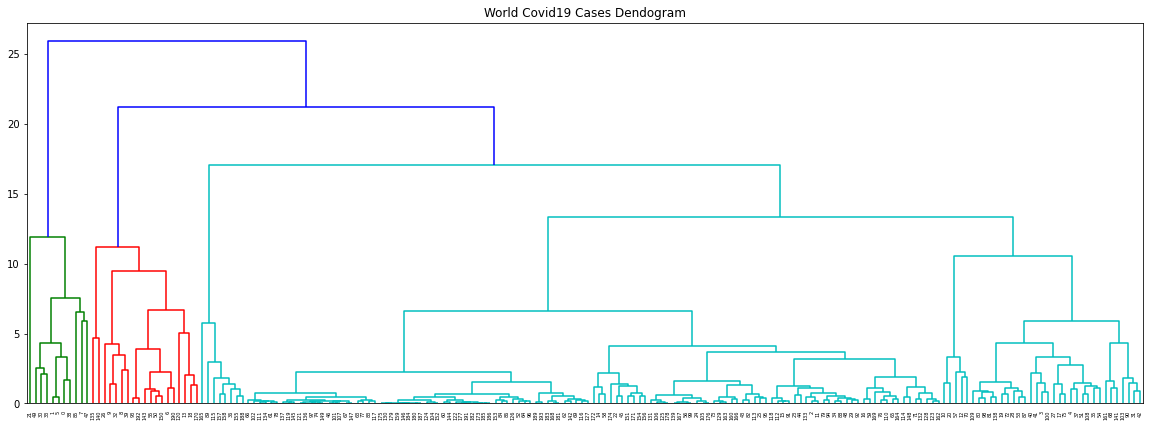

In [26]:
show_dendogram(df_covid_final_scaled)

## 4. Repeat step 3 using the Elbow method (i.e., scree plot)

In [27]:
def calculate_wcss(data):
    wcss = []
    for n in range(2, 16):
        kmeans = KMeans(n_clusters=n, random_state=0)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)
    
    return wcss

In [28]:
wcss_final = calculate_wcss(df_covid_final_scaled)

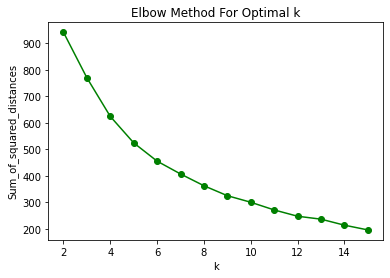

In [29]:
plt.plot(range(2,16), wcss_final, '-go')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## 5. Using the optimal number of clusters determined in 3) above (more conclusive than the Elbow method), implement cluster analysis using k-means and hierarchical (i.e., Page 3 of 3 AgglomarativeClustering) techniques. 


### 5.1 K-Means

In [30]:
kmeans = KMeans(n_clusters=3, random_state=0)
clusters_km = kmeans.fit_predict(df_covid_final_scaled)

print(clusters_km)

[1 1 0 0 0 1 2 1 2 2 0 0 1 2 0 0 0 0 2 0 2 1 0 0 0 0 2 2 0 0 1 0 2 1 0 0 0
 0 1 2 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 2 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 2 0]


### 5.2  HIERARCHICAL CLUSTERING APPROACH

In [35]:
hclust = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

clusters_ac = hclust.fit_predict(df_covid_final_scaled)


In [36]:
clusters_ac

array([1, 1, 0, 0, 0, 1, 2, 1, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1,
       0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0], dtype=int64)

## 6. Compare the strenth of cluster solutions of the two approaches using the following metrics: silhouette_score, calinski_harabasz_score, davies_bouldin_score

#### 6.1 SILHOUETTE COEFFIECIENT

In [44]:
#K-means
silhouette_score(df_covid_final_scaled, clusters_km, metric='euclidean')

0.5310315622336387

In [45]:
#Hierarchical clustering
silhouette_score(df_covid_final_scaled, clusters_ac, metric='euclidean')

0.5346570883978448

#### 6.2 calinski_harabasz_score

In [42]:
#K-means
calinski_harabasz_score(df_covid_final_scaled, clusters_km)

72.88634114982202

In [46]:
#Hierachical clustering
calinski_harabasz_score(df_covid_final_scaled, clusters_ac)

67.16859942675217

#### 6.3 davies_bouldin_score

In [47]:
#K-means
davies_bouldin_score(df_covid_final_scaled, clusters_km)

1.1693915881286654

In [48]:
#Hierarchical clustering
davies_bouldin_score(df_covid_final_scaled, clusters_ac)

1.0979807302454392

# 7. Based on the metrics in 6) above, We have selected the Hierachical clustering as the better technique for further analysis.

# 8. Based on the results of the chosen technique, append cluster membership variable/feature to the data frame you obtained in step 2. i) above (i.e., the data frame containing country column). Yes, I did tell you to keep it intact! Save the data frame to file as a CSV file.

In [49]:
df_covid_final['Clust_mem'] = clusters_ac

In [50]:
df_covid_final

,Country,Mortality_rate,Cases_per_ML,Deaths_per_ML,Recovered_per_ML,Active_per_ML,Critical_per_ML,Tests_per_ML,Clust_mem
0,USA,0.036791,11760.730086,432.691202,5442.836898,5885.201986,50.184605,145951.490666,1
1,Brazil,0.037880,9868.624239,373.828305,6448.825145,3045.970789,39.119161,23096.497056,1
2,India,0.024598,809.846161,19.920454,507.299785,282.625921,6.478149,9989.466264,0
3,Russia,0.015996,5286.818101,84.570342,3771.088984,1431.158776,15.760151,171249.392018,0
4,South Africa,0.013814,6139.385078,84.812381,3219.584478,2834.988220,9.082828,41652.046094,0
...,...,...,...,...,...,...,...,...,...
205,Greenland,0.000000,228.974020,0.000000,228.974020,0.000000,0.000000,91448.701013,0
206,Montserrat,0.083333,2403.846154,200.320513,2003.205128,200.320513,0.000000,12219.551282,2
209,Caribbean Netherlands,0.000000,381.170192,0.000000,266.819135,114.351058,0.000000,16161.616162,0
210,British Virgin Islands,0.125000,264.541516,33.067690,231.473827,0.000000,0.000000,14516.715717,2


In [51]:
df_covid_final.to_csv("df_covid_final_MemSHip.csv")

# 9.Generate a data frame of cluster centers (means) and also save it to a CSV file. Note: even though we are using scaled data to obtain cluster solution, we append cluster membershiop feature and generate cluster centers using unscaled data for easy interpretation.

In [52]:
df_cluster_centers = pd.DataFrame(df_covid_final.groupby('Clust_mem').mean().round(4))

In [53]:
df_cluster_centers

,Mortality_rate,Cases_per_ML,Deaths_per_ML,Recovered_per_ML,Active_per_ML,Critical_per_ML,Tests_per_ML
Clust_mem,,,,,,,
0,0.0224,1562.9449,33.7694,1087.7581,441.4174,5.2403,62077.7402
1,0.0181,16549.0857,229.6818,12688.9369,3630.4671,43.3510,107780.1900
2,0.1175,4727.3580,425.3985,3178.1901,1070.9101,2.0925,76792.5291


In [54]:
df_cluster_centers.to_csv("df_cluster_centers.csv")